# Expansión Térmica del Material (Nitinol)

El objetivo de la función es calcular la expansión del material (como el Nitinol) en función de la temperatura, teniendo en cuenta el cambio de fase entre **martensita** y **austenita**.

## Fórmulas utilizadas

### 1. Expansión Térmica en Martensita (Antes de $A_s$):

La fórmula básica de expansión térmica es:

$$
D(T) = D_{\text{inicial}} \times (1 + \alpha_m \times \Delta T)
$$

- $D_{\text{inicial}}$: El diámetro inicial o longitud del material a temperatura baja ($T_{\text{min}}$).
- $\alpha_m$: Coeficiente de expansión térmica en martensita.
- $\Delta T$: Diferencia de temperatura ($T - T_{\text{min}}$).

**¿Qué significa?**
En este caso, cuando la temperatura es menor que la temperatura de inicio de transformación $A_s$, el material sigue siendo completamente martensita. Aquí, la expansión es lineal y solo depende de la temperatura.

### 2. Expansión Térmica en la Transición de Fase (Entre $A_s$ y $A_f$):

En este rango de temperaturas, el material está en transición entre martensita y austenita. Aquí utilizamos una **curva de transformación** que depende de cómo varía la fase entre $A_s$ y $A_f$:

$$
\text{fracción transformada} = \frac{1}{2} \times \left(1 - \cos \left( \pi \times f \right)\right)
$$

donde:

$$
f = \frac{T - A_s}{A_f - A_s}
$$

- $f$: Fracción de la transformación de fase, que varía de 0 (todo martensita) a 1 (todo austenita).
- $\text{fracción transformada}$: Cómo cambia el volumen del material a medida que pasa de martensita a austenita.

El término de expansión térmica se calcula como:

$$
\text{expansión térmica} = (1 + \alpha_m \times \Delta T_1) \times (1 + \alpha_a \times \Delta T_2)
$$

donde:
- $\Delta T_1$: Diferencia de temperatura entre $T_{\text{min}}$ y $A_s$.
- $\Delta T_2$: Diferencia de temperatura entre $A_s$ y $T$.
- $\alpha_a$: Coeficiente de expansión térmica en la fase austenita.

**¿Qué significa?**
En este intervalo de temperaturas, la expansión térmica no es solo una función de la temperatura, sino que también depende de cuánto se ha transformado el material de martensita a austenita. A medida que más material se convierte en austenita, su expansión será mayor debido a su mayor coeficiente de expansión térmica.

### 3. Expansión Térmica en Austenita Completa (Después de $A_f$):

Cuando la temperatura supera $A_f$, todo el material ha cambiado a austenita. La expansión térmica es completamente determinada por el coeficiente de expansión térmica $\alpha_a$ de la fase austenita:

$$
D(T) = D_{\text{inicial}} \times (1 + \alpha_m \times \Delta T_1) \times (1 + \alpha_a \times \Delta T_2) \times (1 + 1)
$$

Aquí, la fracción transformada es igual a 1 (es decir, el material es completamente austenita).

**¿Qué significa?**
Una vez que el material ha alcanzado el 100% de austenita, la expansión térmica se comporta como si fuera un material homogéneo con coeficiente de expansión $\alpha_a$, y el material sigue expandiéndose a medida que sube la temperatura.

## Cálculo Final:

Para cada temperatura $T$ entre $T_{\text{min}}$ y $T_{\text{max}}$, calculamos el valor de $D(T)$, que nos da el diámetro (o longitud) del material en función de la temperatura.

- **Antes de $A_s$**: Solo depende de $\alpha_m$.
- **Entre $A_s$ y $A_f$**: Depende de la fase martensita y de la fracción transformada.
- **Después de $A_f$**: Solo depende de $\alpha_a$, y el material está completamente transformado en austenita.

## Visualización y Resultados:

Una vez que se calcula $D(T)$ para todo el rango de temperaturas, mostramos un gráfico de la expansión térmica. En este gráfico:
- La línea **roja** indica la temperatura de $37^\circ$C, para mostrar el valor de $D$ a esa temperatura.
- La **zona sombreada** en gris muestra el rango de transición de fase, donde el material cambia de martensita a austenita.
- Los gráficos de **diámetro** y **longitud** se visualizan con líneas de colores diferentes (azul para diámetro y verde para longitud), permitiendo comparar cómo se comporta el material en función de la temperatura.

## ¿Qué pasa en el gráfico?
- En el gráfico, puedes observar cómo el material se expande y cómo el cambio de fase afecta la expansión térmica. 
- En temperaturas menores a $A_s$, el material sigue siendo martensita y su expansión es menor.
- Al entrar en el rango de transición de fase (entre $A_s$ y $A_f$), la expansión aumenta debido a la mezcla de fases martensita y austenita.
- Después de $A_f$, el material está completamente austenita, y su expansión térmica sigue un comportamiento más homogéneo y predecible.

## Resumen de lo que hace el código:
1. Calcula la expansión térmica en función de la temperatura y las transiciones de fase.
2. Muestra el gráfico con las líneas correspondientes y resalta la zona de transición de fase.
3. Permite observar cómo varía el diámetro o la longitud del material con la temperatura.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Función general
def expansion(tipo, T_min, T_max, D_inicial, As, Af, alpha_m, alpha_a):
    T = np.linspace(T_min, T_max, 500)
    D = np.zeros_like(T)

    for i, temp in enumerate(T):
        if temp < As:
            delta_T = temp - T_min
            # Expansión en martensita
            D[i] = D_inicial * (1 + alpha_m * delta_T)
        elif As <= temp <= Af:
            # En la transición de fase
            f = (temp - As) / (Af - As)
            fraccion_transformada = 0.5 * (1 - np.cos(np.pi * f))  # Curva de transformación
            delta_T1 = As - T_min
            delta_T2 = temp - As
            expansion_termica = (1 + alpha_m * delta_T1) * (1 + alpha_a * delta_T2)
            D[i] = D_inicial * expansion_termica * (1 + fraccion_transformada)
        else:
            # Expansión en austenita completa
            delta_T1 = As - T_min
            delta_T2 = temp - As
            expansion_termica = (1 + alpha_m * delta_T1) * (1 + alpha_a * delta_T2)
            fraccion_transformada = 1  # 100% transformado
            D[i] = D_inicial * expansion_termica * (1 + fraccion_transformada)

    # Configurar el color de la línea según el tipo
    if tipo == "diámetro":
        color_linea = 'blue'
    elif tipo == "longitud":
        color_linea = 'green'
    else:
        color_linea = 'black'  # Color por defecto

    
    # Mostrar gráfico
    plt.figure(figsize=(9, 5))
    plt.plot(T, D, label=f'{tipo.capitalize()} inicial = {D_inicial} mm', color=color_linea)
    plt.axvline(37, color='red', linestyle='--', label=f'37°C = {D[np.abs(T - 37).argmin()]:.4f} mm')
    plt.axvspan(As, Af, color='gray', alpha=0.2, label='Rango de transición')
    plt.title(f'Expansión del stent de Nitinol - {tipo.capitalize()}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel(f'{tipo.capitalize()} (mm)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

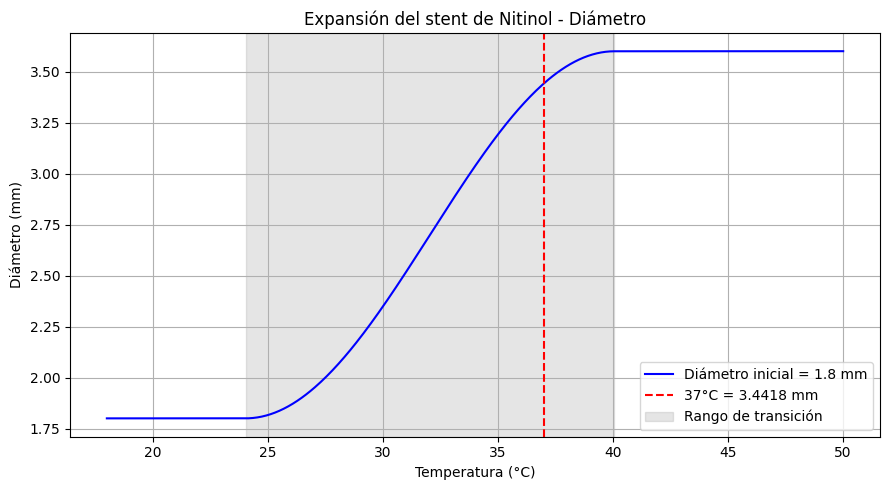

In [6]:
# Llamada a la función para el diámetro
expansion(tipo="diámetro", T_min=18, T_max=50, D_inicial=1.8, As=24.028, Af=40.060, alpha_m=6.6e-6, alpha_a=11e-6)

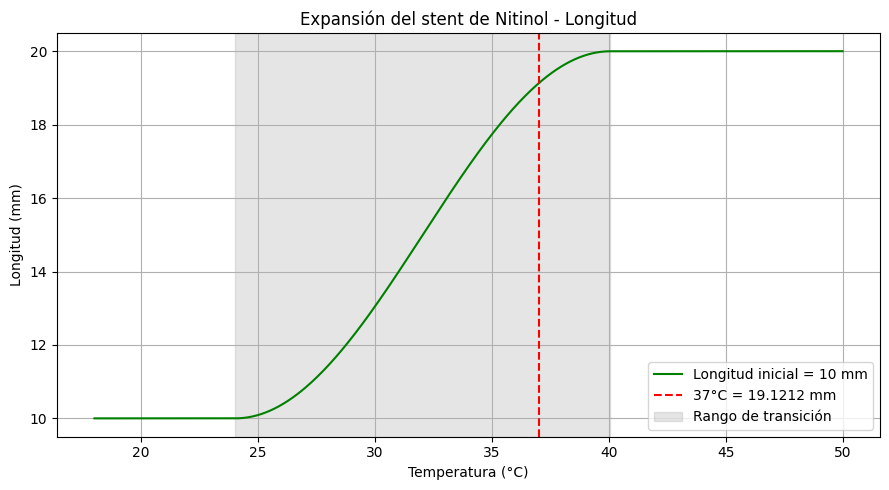

In [7]:
# Llamada a la función para la longitud
expansion(tipo="longitud", T_min=18, T_max=50, D_inicial=10, As=24.028, Af=40.060, alpha_m=6.6e-6, alpha_a=11e-6)